# Business Problem

KBO Marketing Company LLC is a marketing company.  KBO Marketing has been retained by Apple and Google to perform the following:

- understand product sentiment analysis - in particular, whether or not the product sentiment is positive or not positive;
- and proactively respond to feedback that is less than positive via social media  

# Data Understanding

The data for examing the aforementioned problem comes from the following source: [Brands and Product Emotions](https://data.world/crowdflower/brands-and-product-emotions) 

Before beginning to create a model, I want to examine and become familiar with the dataset. I will conduct exploratory data analysis in order to understand the dataset attributes, which includes, but not limited to the following:

1. Number of Columns
2. Number of Rows
3. Column Names
4. Format of the data in each column

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

import nltk
import re
nltk.download('punkt')
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to C:\Users\16467/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16467/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
# Reading file

df = pd.read_csv('tweet_product_company.csv')

In [109]:
# Examining first 10 rows

df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [110]:
# Examining last 10 rows

df.tail(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
8711,"Google says the future is all around you! (ie,...",NaN,No emotion toward brand or product
8712,"Google says the future is location, location, ...",NaN,No emotion toward brand or product
8713,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion
8714,Google says: want to give a lightning talk to ...,NaN,No emotion toward brand or product
8715,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8718,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8719,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
8720,�ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...,NaN,No emotion toward brand or product


In [111]:
# Getting column info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8720 non-null   object
 1   emotion_in_tweet_is_directed_at                     3169 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


## Data Overview

I created a Pandas DataFrame from the csv file.  The DataFrame contains 8,721 rows of data.  The DataFrame contains the following columns:

- *df['tweet_text']* - this is the sentiment provided via tweet
- *df['emotion_in_tweet_is_directed_at']* - this is the brand, or product, in which the tweet is targeted
- *df['is_there_an_emotion_directed_at_a_brand_or_product']* - this is the emotional category of the tweet

All of the columns are in string format.

In [112]:
# Obtaining number of unique values for the following column - "df['emotion_in_tweet_is_directed_at']"

df['emotion_in_tweet_is_directed_at'].nunique()

9

In [113]:
# Obtaining Value Counts for the following column - "df['emotion_in_tweet_is_directed_at']"

df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: emotion_in_tweet_is_directed_at, dtype: int64

## Observations | Brand or Product

I utilized the following code - *df['emotion_in_tweet_is_directed_at'].value_counts()* - to understand the different brands and products that are captured by the respective column.  The different brands and products are the following: 

- iPad
- Apple
- iPad or iPhone App
- Google
- iPhone
- Other Google product or service
- Android App
- Android
- Other Apple product or service

In [114]:
# Obtaining number of unique values for the following column - "df['is_there_an_emotion_directed_at_a_brand_or_product']"

df['is_there_an_emotion_directed_at_a_brand_or_product'].nunique()

4

In [115]:
# Obtaining Value Counts for the following column - "df['is_there_an_emotion_directed_at_a_brand_or_product']"

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5156
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Observations | Brand or Product Sentiment

I utilized the following code - *df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()* - to understand the brand and product sentiment captured by the respective column.  There are a total of four different brand and product sentiments, which are the following:

- No emotion toward brand or product
- Positive emotion
- Negative emotion
- I can't tell 

In [116]:
# Examining missing values in each column

df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5552
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

## Observations | Missing Values

I utilized the following code - *df.isna().sum()* - to understand how many missing values are within each column.  There is a total of 5,552 missing values in the *df['emotion_in_tweet_is_directed_at']* column.

The other two columns - *df['tweet_text']* and *df['is_there_an_emotion_directed_at_a_brand_or_product']* - did not have missing values.

In [117]:
# Checking for duplicates

df.duplicated().sum()

22

In [118]:
# Creating a dataframe for the duplicates

duplicates_all = df[df.duplicated(keep=False)]

In [119]:
# Examining the dataframe created for the duplicates

duplicates_all

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion
20,Need to buy an iPad2 while I'm in Austin at #s...,iPad,Positive emotion
21,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
24,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
455,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
457,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
750,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
752,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product


## Observations | Duplicate Rows

I utilized the following code - *df.duplicated().sum()* - to understand how many duplicates are present in the dataset.  There is a total of 22 duplicate rows.

# Data Preparation

The Data Understanding stage is complete.  Based on the exploratory data analysis, I will perform the following:

1. Remove duplicate rows
2. Classify the brand or product sentiment into the two following categories - 1) Not Positive, or 2) Positive - via *df['is_there_an_emotion_directed_at_a_brand_or_product']* column 
3. Assign a brand or product to the *df['emotion_in_tweet_is_directed_at']* column in which there is a missing value

## Remove Duplicate Rows

In [120]:
# Checking the number of duplicates

df.duplicated().sum()

22

In [121]:
# Removing duplicates

df.drop_duplicates(inplace=True)

In [122]:
# Checking the number of duplicates again

df.duplicated().sum()

0

In [123]:
# Checking the number of rows in the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8699 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8698 non-null   object
 1   emotion_in_tweet_is_directed_at                     3160 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8699 non-null   object
dtypes: object(3)
memory usage: 271.8+ KB


I utilied the following code - *df.drop_duplicates(inplace=True)* - to remove the duplicates from the DataFrame.  The number of rows is now 8,699.

## Classify the brand or product sentiment

In [60]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5143
Positive emotion                      2861
Negative emotion                       544
I can't tell                           151
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [124]:
# Creating a DataFrame that captures the "I can't tell" sentiment

I_cannot_tell = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell")].index

In [125]:
# Removing rows with a brand / product sentiment that is "I can't tell"

df.drop(I_cannot_tell, inplace=True)

In [126]:
# Checking whether or not the DataFrame no longer captures the "I can't tell" sentiment

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5143
Positive emotion                      2861
Negative emotion                       544
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [127]:
# Replacing 'Positive emotion' with 'Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.replace("Positive emotion", "Positive")

In [128]:
# Checking whether or not 'Positive emotion' is replaced with 'Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5143
Positive                              2861
Negative emotion                       544
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [129]:
# Replacing 'No emotion toward brand or product' with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.replace("No emotion toward brand or product", "Not Positive")

In [130]:
# Checking whether or not 'No emotion toward brand or product' is replaced with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Not Positive        5143
Positive            2861
Negative emotion     544
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [131]:
# Replacing 'Negative emotion' with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.replace("Negative emotion", "Not Positive")

In [133]:
# Checking whether or not 'Negative emotion' is replaced with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Not Positive    5687
Positive        2861
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

Text(0.5, 1.0, 'Breakdown of Brand and Product Sentiment')

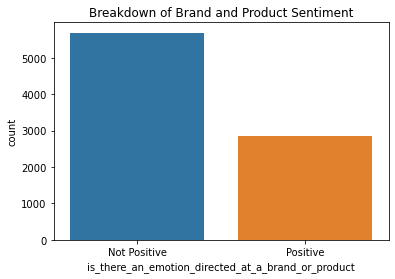

In [134]:
# Create a bar chart for Value Counts of 'Positive' and 'Not Positive'

sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)

plt.title("Breakdown of Brand and Product Sentiment")

## Filling Missing Values

In [135]:
# Checking the different values for the following column - 'df['emotion_in_tweet_is_directed_at']'

df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               905
Apple                              636
iPad or iPhone App                 450
Google                             409
iPhone                             286
Other Google product or service    281
Android App                         77
Android                             73
Other Apple product or service      34
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [136]:
# Creating a list for all of the different values in the 'df['emotion_in_tweet_is_directed_at']' column

brand_product_list = ['iPad', 'Apple', 'iPad or iPhone App', 'iPad', 'iPhone App', 'Google', 'iPhone', 'Other Google product or service', 'Android App', 'Android', 'Other Apple product or service']

In [138]:
# Creating a loop to assign a brand or product for missing values in the 'df['emotion_in_tweet_is_directed_at']' column

df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].apply(
    lambda x: brand_product_list.pop(0) if pd.isna(x) and brand_product_list else x)

In [139]:
# Examining missing values in each column

df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5386
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [140]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               907
Apple                              637
iPad or iPhone App                 451
Google                             410
iPhone                             287
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      35
iPhone App                           1
Name: emotion_in_tweet_is_directed_at, dtype: int64

Text(0.5, 1.0, 'Feature Importance (by Coefficients)')

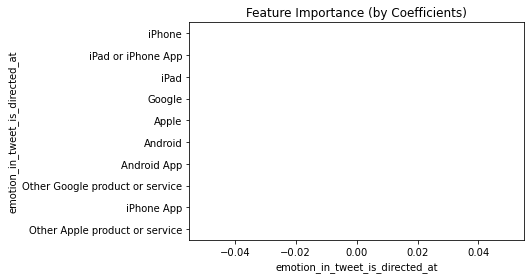

In [141]:
sns.barplot(x=df['emotion_in_tweet_is_directed_at'].value_counts(), y=df['emotion_in_tweet_is_directed_at'], data=df)

plt.title("Feature Importance (by Coefficients)")

# Modeling

# Overall Conclusions and Recommendations